<a href="https://colab.research.google.com/github/Jayzeferino/PDI/blob/main/TRabalhoPDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Pré-processamento e Seleção de Imagens:

Coleta de Dados: Obtenha as imagens dos catálogos. É crucial ter imagens de alta resolução para facilitar o processamento.
Filtragem Manual (Inicial): Antes de qualquer processamento automático, faça uma triagem manual para separar as imagens que mostram tiles individuais das imagens que mostram simulações de implantação. Este passo é importante porque as simulações tendem a ter padrões repetitivos e elementos de "rejunte" que dificultam a segmentação de peças únicas.
Você está buscando imagens onde cada tile aparece claramente separado ou com um fundo neutro.
Normalização de Cores e Iluminação (Opcional, mas útil): Se as imagens tiverem variações significativas de iluminação ou balanço de cores, pode ser útil aplicar técnicas de normalização. Isso pode envolver:

Ajuste de Brilho e Contraste: Para padronizar a gama de cores.
Equalização de Histograma: Para distribuir a intensidade dos pixels de forma mais uniforme.

2. Detecção e Segmentação de Bordas dos Tiles:

Esta é a etapa mais crítica e onde você focará em identificar os limites de cada tile individual.

Transformação para Escala de Cinza: Converta a imagem colorida para escala de cinza. Muitos algoritmos de detecção de bordas funcionam melhor ou exclusivamente em imagens em escala de cinza, pois simplifica a análise da intensidade.
Filtros de Suavização (Noise Reduction): Aplique filtros de suavização para remover ruídos da imagem que podem interferir na detecção de bordas. Exemplos de filtros sem OpenCV seriam:
Filtro da Média (Average Filter): Substitui cada pixel pela média dos pixels vizinhos.
Filtro Mediana (Median Filter): Substitui cada pixel pela mediana dos pixels vizinhos, sendo eficaz para remover ruídos de sal e pimenta.
Detecção de Bordas (Edge Detection): O objetivo é encontrar as linhas que separam um tile do outro ou de seu fundo. Você precisará de algoritmos que identifiquem mudanças bruscas de intensidade. Exemplos de operadores de borda sem OpenCV:


*   Operadores de Gradiente (Gradient Operators): Como o filtro de Sobel, Prewitt ou Roberts. Esses operadores calculam a magnitude do gradiente em cada pixel, ou seja, a taxa de mudança na intensidade dos pixels. Onde a mudança é maior, há uma borda.

*   Limiarização (Thresholding): Após aplicar um operador de borda, o resultado será uma imagem onde as bordas são mais claras e o restante é mais escuro. Aplique um limiar para converter esta imagem em uma imagem binária (preto e branco), onde pixels acima do limiar são bordas (branco) e abaixo são não-bordas (preto).




3. Agrupamento de Bordas e Identificação de Formas:

Fechamento de Bordas (Edge Linking/Closing): As bordas detectadas podem não ser contínuas. Aplique técnicas para conectar segmentos de bordas que deveriam formar uma única linha. Isso pode envolver:

* Dilatação e Erosão (Morfologia Matemática): Opereções morfológicas podem ser usadas para "engrossar" as bordas (dilatação) e depois "afinar" (erosão) para fechar pequenas lacunas.

* Hough Transform (para formas geométricas): Embora seja um pouco mais complexa de implementar "do zero", a Transformada de Hough pode ser usada para detectar linhas e retângulos (que são as formas mais prováveis dos tiles). Ela funciona mapeando os pontos da imagem para um "espaço de parâmetros" onde linhas e formas se manifestam como picos.

* Segmentação Baseada em Região: Uma vez que você tem as bordas razoavelmente fechadas, você pode usar uma segmentação baseada em região para identificar as áreas internas de cada tile.

* Seed Point Growing (Crescimento de Sementes): Escolha um pixel "semente" dentro de um provável tile. A partir desse ponto, o algoritmo "cresce" para pixels vizinhos que têm propriedades semelhantes (intensidade, cor) até encontrar uma borda.

4. Extração e Criação de Imagens Únicas:

Enquadramento (Bounding Box): Para cada região de tile identificada, determine o menor retângulo que a engloba (bounding box).

Corte (Cropping): Recorte a imagem original usando as coordenadas do bounding box para criar uma nova imagem que contenha apenas o tile.

Redimensionamento (Resizing - Opcional): Se desejar padronizar o tamanho das imagens dos tiles, redimensione as imagens recortadas para uma dimensão específica.

Salvamento: Salve cada imagem de tile individual com um nome significativo.

5. Filtragem de Falsos Positivos (Para ignorar agrupamentos):

Aqui é onde você realmente evita as imagens de "implantação".

Análise de Dimensões/Área: Tiles individuais geralmente têm dimensões dentro de uma faixa esperada. Imagens de implantação, por outro lado, cobrirão uma área muito maior na imagem original e possuirão múltiplos tiles. Se a área da região segmentada for excessivamente grande ou se as dimensões não se encaixarem nos padrões esperados para um único tile, descarte-a.
Análise de Conectividade: Em imagens de implantação, os tiles estão adjacentes e conectados por rejunte. Em imagens de tiles individuais, o tile estará isolado. Após a segmentação, você pode analisar a "conectividade" dos pixels. Se a região segmentada estiver conectada a múltiplas outras regiões ou se apresentar um padrão muito repetitivo (como rejunte), é provável que seja uma imagem de implantação.
Análise de Conteúdo (Textura/Padrão):
Variância da Intensidade: Dentro de uma imagem de tile único, a variância da intensidade dos pixels pode ser mais uniforme ou seguir um padrão específico da textura do porcelanato. Em imagens de implantação, você pode ter grandes variações onde há rejunte ou transições entre diferentes tiles.
Detecção de Repetição: Se você consegue identificar padrões repetitivos de forma consistente em uma região, é um forte indicativo de que é uma simulação de implantação (múltiplos tiles). Isso é um pouco mais complexo de fazer sem bibliotecas, mas pode ser abordado com análise de autocorrelação ou transformadas de Fourier para identificar periodicidade.
Estrutura de Alto Nível (Fluxo de Processo):

Entrada: Imagem de catálogo (colorida).
Pré-processamento:
Triagem Manual (inicial) para separar imagens de tiles individuais vs. agrupados.
Conversão para Escala de Cinza.
Suavização (Ex: Filtro Mediana).
Detecção de Bordas:
Aplicação de Operador de Gradiente (Ex: Sobel).
Limiarização para criar imagem binária de bordas.
Agrupamento e Segmentação:
Fechamento de Bordas (Morfologia: Dilatação seguida de Erosão).
Segmentação por Crescimento de Sementes ou similar (para encontrar as regiões).
Filtragem de Agrupamentos e Extração de Tiles Únicos:
Para cada região segmentada:
Calcular Bounding Box e Área.
Analisar Conectividade e Padrão Repetitivo.
Se for um tile único (passar nos critérios de filtro):
Recortar o tile da imagem original.
Salvar como nova imagem.
Saída: Múltiplas imagens de tiles de porcelanato individuais.
Este processo, sem o uso de bibliotecas como OpenCV, exige uma implementação mais "manual" dos algoritmos de processamento de imagem, mas segue os princípios fundamentais da visão computacional para atingir seu objetivo. A parte mais desafiadora será a implementação eficiente dos operadores de borda, operações morfológicas e técnicas de segmentação a partir do zero.

In [55]:
import numpy as np
from skimage import io, measure, morphology, transform, exposure
from skimage.segmentation import flood_fill
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte
from scipy.signal import convolve2d
from skimage.filters import threshold_otsu
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening,square, disk)
from skimage.morphology import footprint_rectangle

import math
from skimage.draw import disk
import matplotlib.pyplot as plt

<ipython-input-71-3669844123>:15: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(binary)


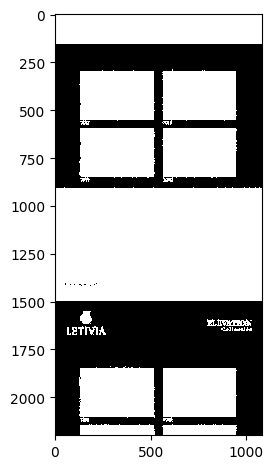

In [71]:
def butterworth(shape,d0,n):
  H=np.zeros(shape)
  for u in range(shape[0]):
    for v in range(shape[1]):
      D_uv=np.sqrt( (u-shape[0]/2)**2 + (v-shape[1]/2)**2 )
      H[u,v] = 1/ (1+ (D_uv/d0 )**(2*n))
  return H

img= io.imread('Screenshot_20231005_130808_Samsung Notes.jpg')
img = rgb2gray(img)
img = exposure.equalize_hist(img)

resized= transform.resize(img, (200, 100))
binary = img < threshold_otsu(img)
imshow(binary)

In [74]:
opened= dilation(binary, footprint_rectangle((5, 5)))
binary = binary - opened

imshow(binary)



# img[opened]=0
# imshow(img)

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

<ipython-input-53-1220937686>:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(opened, cmap='gray')


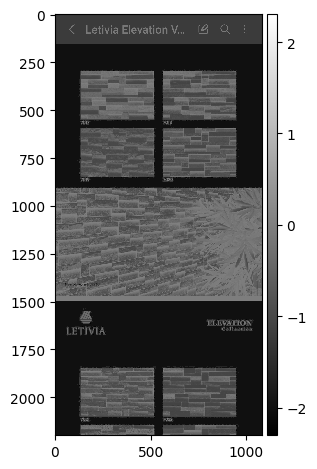

In [53]:
opened = binary - opened
imshow(opened, cmap='gray')

In [ ]:

# sobelFilterN1 = np.array([
#     [-1,-2,-1],
#     [0,0,0],
#     [1,2,1]
# ])

# sobelFilterN2 = np.array([
#     [-1,0,1],
#     [-2,0,2],
#     [-1,0,1]
# ])

# n1 = convolve2d(img,sobelFilterN1, mode='same', boundary='symm')
# n2 = convolve2d(img,sobelFilterN2, mode='same', boundary='symm')

# gradiente = np.sqrt(n1**2 + n2**2)
# f=np.fft.fft2(img)
# f_s=np.fft.fftshift(f)


#Apenas para exibir
# temp= np.log(abs(f_s))
# io.imshow(img, cmap="gray")
# io.imshow(equalized_image, cmap="gray")

# 2. Escolher um ponto semente (seed point)
# altura, largura = gradiente.shape[:2] # Pega apenas altura e largura, ignorando canais se houver

# Calcule as coordenadas do centro (arredondando para o inteiro mais próximo)
# center_y = int(np.round(altura / 2)) # Coordenada Y (linha)
# center_x = int(np.round(largura / 2)) # Coordenada X (coluna)
# seed_point = (center_y, center_x) # Centro


# 3. Aplicar flood_fill
# O argumento `tolerance` define o quão diferentes os pixels podem ser do valor original do seed_point
# para serem incluídos na região.
# `new_value` é o valor com o qual a região segmentada será preenchida.
# segmented_image_fill = flood_fill(gradiente, seed_point, new_value=255, tolerance=0.1)




In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
ax = axes.ravel()

ax[0].imshow(resized,cmap='gray')
ax[0].set_title("Imagem Original")
ax[0].axis('off')

ax[1].imshow(binary,cmap='gray')
ax[1].set_title("Imagem TrashHold")
ax[1].axis('off')

# ax[1].imshow(gradiente, cmap='gray')
# ax[1].set_title("Borda")
# ax[1].axis('off')


# ax[2].imshow(segmented_image_fill,cmap='gray')
# ax[2].set_title("Segmentado")
# ax[2].axis('off')
# ax[1].imshow(equalized_image, cmap='gray')
# ax[1].set_title("Histograma Equalizado")
# ax[1].axis('off')

plt.tight_layout()
plt.show()


# #ideal passa baixa
# mask = np.zeros(img.shape,dtype=np.ubyte)
# rr,cc=disk((img.shape[0]/2,img.shape[1]/2),30,shape=img.shape)
# mask[rr,cc]=255
# filtered=f_s*temp
# filtered_unshift= np.fft.ifftshift(filtered)
# space_f= np.abs(np.fft.ifft2(filtered_unshift))
# io.imshow(temp, cmap="gray")




